In [20]:
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10

from matplotlib import pyplot as plt

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [6]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [7]:
print(f"[{X_train.min()}, {X_train.max()}]")

[0, 255]


In [8]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [15]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [16]:
class_names = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat',
               4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse',
               8: 'ship', 9: 'truck'}

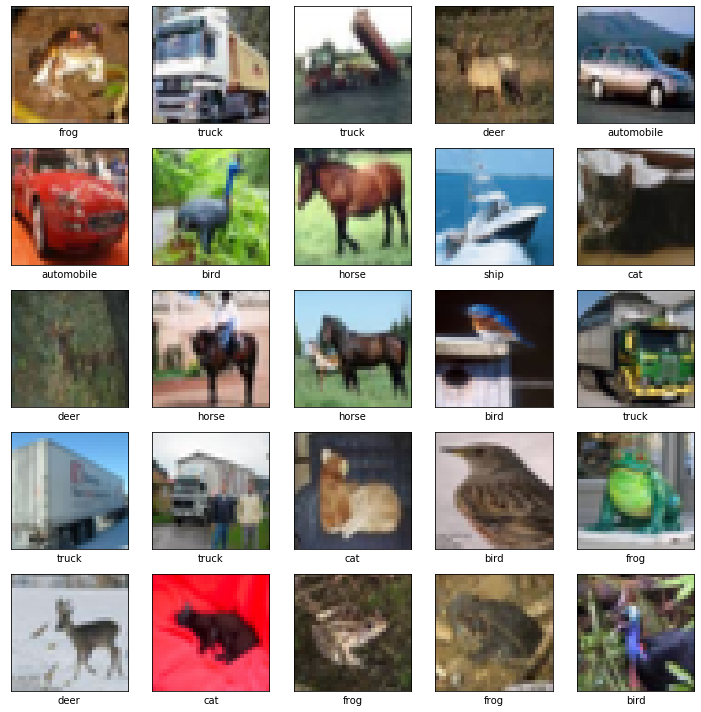

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap='gray_r')
    plt.xlabel(class_names[y_train[i,0]])
plt.tight_layout()

In [19]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3, 3), activation='relu'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 18s 363us/sample - loss: 1.5181 - accuracy: 0.4458 - val_loss: 1.2512 - val_accuracy: 0.5494
Epoch 2/10
50000/50000 [==============================] - 8s 161us/sample - loss: 1.1554 - accuracy: 0.5919 - val_loss: 1.0699 - val_accuracy: 0.6157
Epoch 3/10
50000/50000 [==============================] - 8s 157us/sample - loss: 1.0059 - accuracy: 0.6472 - val_loss: 0.9831 - val_accuracy: 0.6565
Epoch 4/10
50000/50000 [==============================] - 8s 159us/sample - loss: 0.9029 - accuracy: 0.6848 - val_loss: 0.9234 - val_accuracy: 0.6780
Epoch 5/10
50000/50000 [==============================] - 8s 156us/sample - loss: 0.8358 - accuracy: 0.7086 - val_loss: 0.9168 - val_accuracy: 0.6825
Epoch 6/10
50000/50000 [==============================] - 8s 157us/sample - loss: 0.7773 - accuracy: 0.7272 - val_loss: 0.8949 - val_accuracy: 0.6945
Epoch 7/10
50000/50000 [=========================

10000/1 - 1s - loss: 0.9793 - accuracy: 0.7075
0.7075


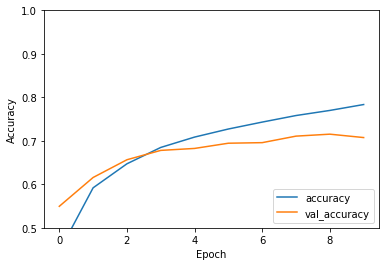

In [24]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc=4)

_, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(test_acc)
